# Bangalore Traffic Analysis Dashboard

## Comprehensive Traffic Flow Patterns, Congestion Analysis, and External Factor Impact Study

This notebook provides a complete analysis of Bangalore traffic data covering:

### 1. Traffic Flow Patterns
- Peak hour identification across different areas and roads
- Seasonal traffic variations (daily, weekly, monthly patterns)
- Area-wise traffic density comparison
- Road-specific congestion hotspots
- Traffic volume distribution and anomaly detection

### 2. Speed and Congestion Analysis
- Speed-volume relationships
- Congestion propagation patterns
- Travel time variability analysis
- Road capacity utilization efficiency
- Infrastructure bottleneck identification

### 3. External Factor Impact Analysis
- Weather influence on traffic patterns
- Construction activity impact
- Incident effect analysis
- Public transport correlation
- Environmental impact patterns

### 4. Behavioral and Infrastructure Analysis
- Traffic signal compliance patterns
- Parking utilization impact
- Pedestrian and cyclist activity correlation
- Multimodal transport interaction analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from scipy import stats
import math

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the traffic dataset
df = pd.read_csv('Banglore_traffic_Dataset.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayName'] = df['Date'].dt.day_name()
df['MonthName'] = df['Date'].dt.month_name()
df['Week'] = df['Date'].dt.isocalendar().week

# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (8936, 23)

Column Names:
['Date', 'Area_Name', 'Road_Intersection Name', 'Traffic_Volume', 'Average_Speed', 'Travel_Time_Index', 'Congestion_Level', 'Road_Capacity_Utilization', 'Incident_Reports', 'Environmental_Impact', 'Public_Transport_Usage', 'Traffic_Signal_Compliance', 'Parking_Usage', 'Pedestrian_and_Cyclist_Count', 'Weather_Conditions', 'Roadwork_and_Construction_Activity', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayName', 'MonthName', 'Week']

First few rows:


,Date,Area_Name,Road_Intersection Name,Traffic_Volume,Average_Speed,Travel_Time_Index,Congestion_Level,Road_Capacity_Utilization,Incident_Reports,Environmental_Impact,Public_Transport_Usage,Traffic_Signal_Compliance,Parking_Usage,Pedestrian_and_Cyclist_Count,Weather_Conditions,Roadwork_and_Construction_Activity,Year,Month,Day,DayOfWeek,DayName,MonthName,Week
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,2022,1,1,5,Saturday,January,52
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,2022,1,1,5,Saturday,January,52
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,2022,1,1,5,Saturday,January,52
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,2022,1,1,5,Saturday,January,52
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,2022,1,1,5,Saturday,January,52


In [3]:
# Data exploration and summary statistics
print("Dataset Information:")
print(f"Total records: {len(df)}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of unique areas: {df['Area_Name'].nunique()}")
print(f"Number of unique roads: {df['Road_Intersection Name'].nunique()}")

print("\nUnique Areas:")
print(df['Area_Name'].value_counts())

print("\nWeather Conditions:")
print(df['Weather_Conditions'].value_counts())

print("\nConstruction Activity:")
print(df['Roadwork_and_Construction_Activity'].value_counts())

print("\nBasic Statistics:")
df.describe()

Dataset Information:
Total records: 8936
Date range: 2022-01-01 00:00:00 to 2024-08-09 00:00:00
Number of unique areas: 8
Number of unique roads: 16

Unique Areas:
Area_Name
Indiranagar        1720
M.G. Road          1501
Koramangala        1364
Jayanagar          1173
Hebbal              950
Whitefield          942
Yeshwanthpur        734
Electronic City     552
Name: count, dtype: int64

Weather Conditions:
Weather_Conditions
Clear       5426
Overcast    1296
Fog          959
Rain         827
Windy        428
Name: count, dtype: int64

Construction Activity:
Roadwork_and_Construction_Activity
No     8054
Yes     882
Name: count, dtype: int64

Basic Statistics:


,Date,Traffic_Volume,Average_Speed,Travel_Time_Index,Congestion_Level,Road_Capacity_Utilization,Incident_Reports,Environmental_Impact,Public_Transport_Usage,Traffic_Signal_Compliance,Parking_Usage,Pedestrian_and_Cyclist_Count,Year,Month,Day,DayOfWeek,Week
count,8936,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.0
mean,2023-04-22 05:25:11.548791552,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348,2022.851723,5.976611,15.647605,2.986235,24.199082
min,2022-01-01 00:00:00,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000,2022.000000,1.000000,1.000000,0.000000,1.0
25%,2022-08-26 00:00:00,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000,2022.000000,3.000000,8.000000,1.000000,12.0
50%,2023-04-24 00:00:00,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000,2023.000000,6.000000,16.000000,3.000000,23.0
75%,2023-12-17 06:00:00,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000,2023.000000,9.000000,23.000000,5.000000,36.0
max,2024-08-09 00:00:00,72039.000000,89.790843,1.500000,100.000000,100.000000,10.000000,194.078000,79.979744,99.993652,99.995049,243.000000,2024.000000,12.000000,31.000000,6.000000,52.0
std,NaN,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573,0.772103,3.336125,8.860021,2.007967,14.547719


# 1. Traffic Flow Patterns Analysis

In [3]:
# 1.1 Peak Hour Identification Across Different Areas and Roads

# Calculate traffic volume statistics by area
area_traffic_stats = df.groupby('Area_Name').agg({
    'Traffic_Volume': ['mean', 'max', 'std'],
    'Congestion_Level': 'mean',
    'Average_Speed': 'mean'
}).round(2)

area_traffic_stats.columns = ['Avg_Traffic', 'Max_Traffic', 'Traffic_Std', 'Avg_Congestion', 'Avg_Speed']
area_traffic_stats = area_traffic_stats.sort_values('Avg_Traffic', ascending=False)

print("Area-wise Traffic Statistics:")
print(area_traffic_stats)

# Identify peak traffic periods by day of week
daily_traffic = df.groupby('DayName').agg({
    'Traffic_Volume': 'mean',
    'Congestion_Level': 'mean',
    'Average_Speed': 'mean'
}).round(2)

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic = daily_traffic.reindex(day_order)

print("\nDaily Traffic Patterns:")
print(daily_traffic)

Area-wise Traffic Statistics:
                 Avg_Traffic  Max_Traffic  Traffic_Std  Avg_Congestion  \
Area_Name                                                                
Koramangala         40832.25        72039     14130.78           93.99   
M.G. Road           35300.43        63390     11896.45           90.58   
Indiranagar         32284.39        61638     11269.61           87.64   
Hebbal              26533.23        49783      9711.26           80.09   
Jayanagar           24601.33        47068      8597.55           77.00   
Whitefield          21295.13        41527      7826.45           69.05   
Yeshwanthpur        18931.55        38877      7085.27           62.37   
Electronic City     16346.64        33855      6218.88           54.45   

                 Avg_Speed  
Area_Name                   
Koramangala          36.06  
M.G. Road            37.54  
Indiranagar          38.64  
Hebbal               40.15  
Jayanagar            39.79  
Whitefield           42.14

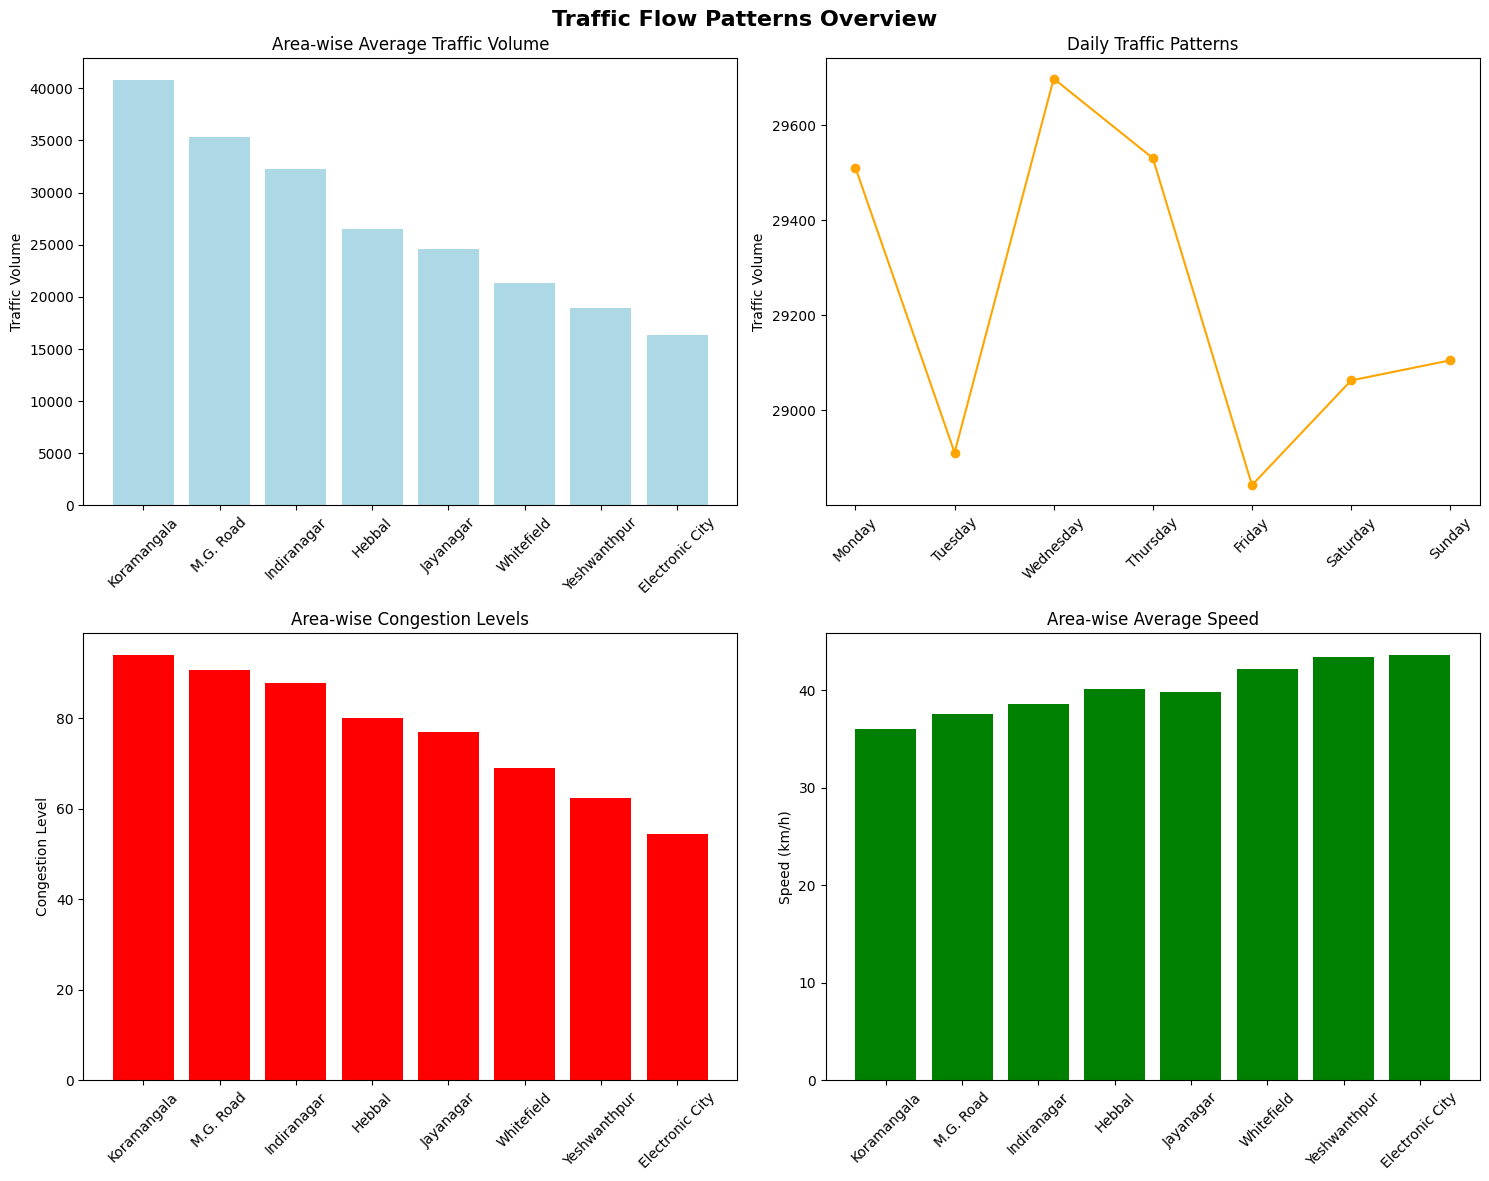

In [4]:
# Visualizations for Peak Hour Analysis

# Create subplots using matplotlib
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Traffic Flow Patterns Overview', fontsize=16, fontweight='bold')

# Area-wise traffic volume
axes[0,0].bar(area_traffic_stats.index, area_traffic_stats['Avg_Traffic'], color='lightblue')
axes[0,0].set_title('Area-wise Average Traffic Volume')
axes[0,0].set_ylabel('Traffic Volume')
axes[0,0].tick_params(axis='x', rotation=45)

# Daily traffic patterns
axes[0,1].plot(daily_traffic.index, daily_traffic['Traffic_Volume'], marker='o', color='orange')
axes[0,1].set_title('Daily Traffic Patterns')
axes[0,1].set_ylabel('Traffic Volume')
axes[0,1].tick_params(axis='x', rotation=45)

# Area-wise congestion
axes[1,0].bar(area_traffic_stats.index, area_traffic_stats['Avg_Congestion'], color='red')
axes[1,0].set_title('Area-wise Congestion Levels')
axes[1,0].set_ylabel('Congestion Level')
axes[1,0].tick_params(axis='x', rotation=45)

# Area-wise speed
axes[1,1].bar(area_traffic_stats.index, area_traffic_stats['Avg_Speed'], color='green')
axes[1,1].set_title('Area-wise Average Speed')
axes[1,1].set_ylabel('Speed (km/h)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Monthly Traffic Patterns:
           Traffic_Volume  Congestion_Level  Average_Speed
MonthName                                                 
January          28830.12             79.53          39.28
February         29147.93             80.75          39.08
March            29515.96             81.37          39.36
April            29573.89             81.27          39.23
May              28926.73             80.30          40.30
June             29741.80             81.12          39.67
July             28875.46             80.48          39.36
August           29504.12             81.56          39.14
September        29083.17             80.44          39.29
October          29380.75             81.45          39.37
November         29302.75             81.73          39.88
December         28952.19             80.13          39.37

Weekly Traffic Variations (Sample):
      Traffic_Volume  Congestion_Level
Week                                  
1           29120.88             

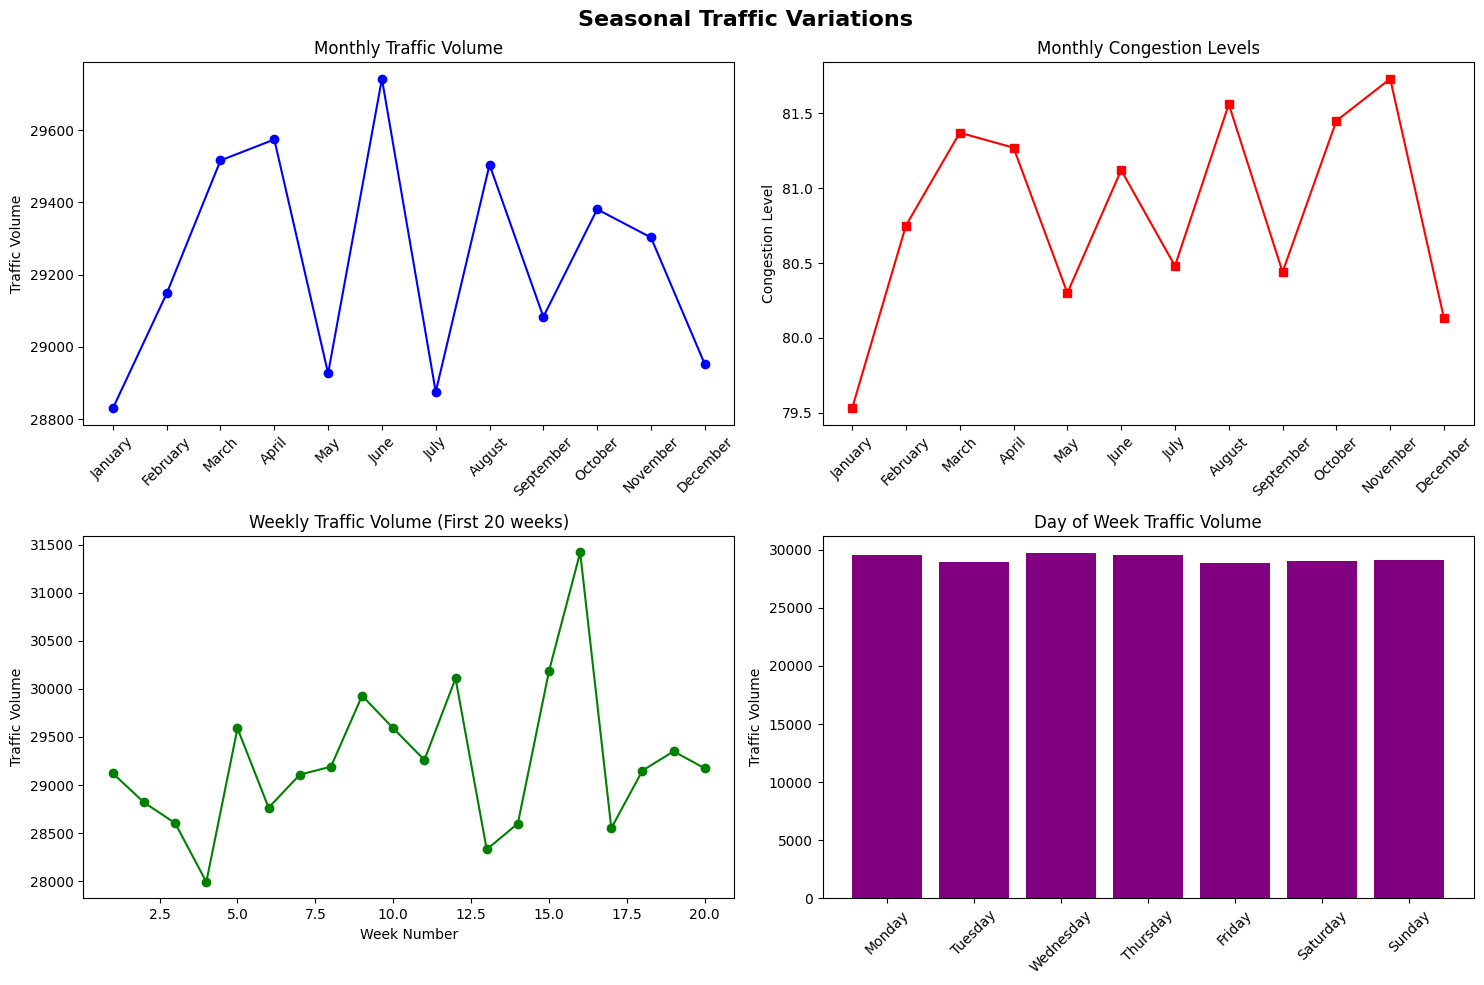

In [5]:
# 1.2 Seasonal Traffic Variations (Daily, Weekly, Monthly Patterns)

# Monthly traffic patterns
monthly_traffic = df.groupby('MonthName').agg({
    'Traffic_Volume': 'mean',
    'Congestion_Level': 'mean',
    'Average_Speed': 'mean'
}).round(2)

# Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_traffic = monthly_traffic.reindex([m for m in month_order if m in monthly_traffic.index])

# Weekly traffic patterns (by week number)
weekly_traffic = df.groupby('Week').agg({
    'Traffic_Volume': 'mean',
    'Congestion_Level': 'mean'
}).round(2)

print("Monthly Traffic Patterns:")
print(monthly_traffic)

print("\nWeekly Traffic Variations (Sample):")
print(weekly_traffic.head(10))

# Visualize seasonal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Seasonal Traffic Variations', fontsize=16, fontweight='bold')

# Monthly traffic volume
axes[0,0].plot(monthly_traffic.index, monthly_traffic['Traffic_Volume'], marker='o', color='blue')
axes[0,0].set_title('Monthly Traffic Volume')
axes[0,0].set_ylabel('Traffic Volume')
axes[0,0].tick_params(axis='x', rotation=45)

# Monthly congestion
axes[0,1].plot(monthly_traffic.index, monthly_traffic['Congestion_Level'], marker='s', color='red')
axes[0,1].set_title('Monthly Congestion Levels')
axes[0,1].set_ylabel('Congestion Level')
axes[0,1].tick_params(axis='x', rotation=45)

# Weekly traffic volume (first 20 weeks)
axes[1,0].plot(weekly_traffic.index[:20], weekly_traffic['Traffic_Volume'][:20], marker='o', color='green')
axes[1,0].set_title('Weekly Traffic Volume (First 20 weeks)')
axes[1,0].set_ylabel('Traffic Volume')
axes[1,0].set_xlabel('Week Number')

# Day of week vs Traffic
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[1,1].bar(day_order, daily_traffic.loc[day_order, 'Traffic_Volume'], color='purple')
axes[1,1].set_title('Day of Week Traffic Volume')
axes[1,1].set_ylabel('Traffic Volume')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Detailed Area Comparison (Indiranagar vs Whitefield vs Koramangala):
            Traffic_Volume                                  Congestion_Level  \
                      mean   median       std    min    max             mean   
Area_Name                                                                      
Indiranagar       32284.39  33838.0  11269.61   8796  61638            87.64   
Koramangala       40832.25  43309.5  14130.78  12051  72039            93.99   
Whitefield        21295.13  21655.0   7826.45   5915  41527            69.05   

                           Average_Speed                \
             median    std          mean median    std   
Area_Name                                                
Indiranagar  100.00  19.39         38.64  38.25  10.89   
Koramangala  100.00  15.04         36.06  35.59   9.74   
Whitefield    70.79  23.79         42.14  42.68  10.64   

            Road_Capacity_Utilization        Travel_Time_Index         \
                            

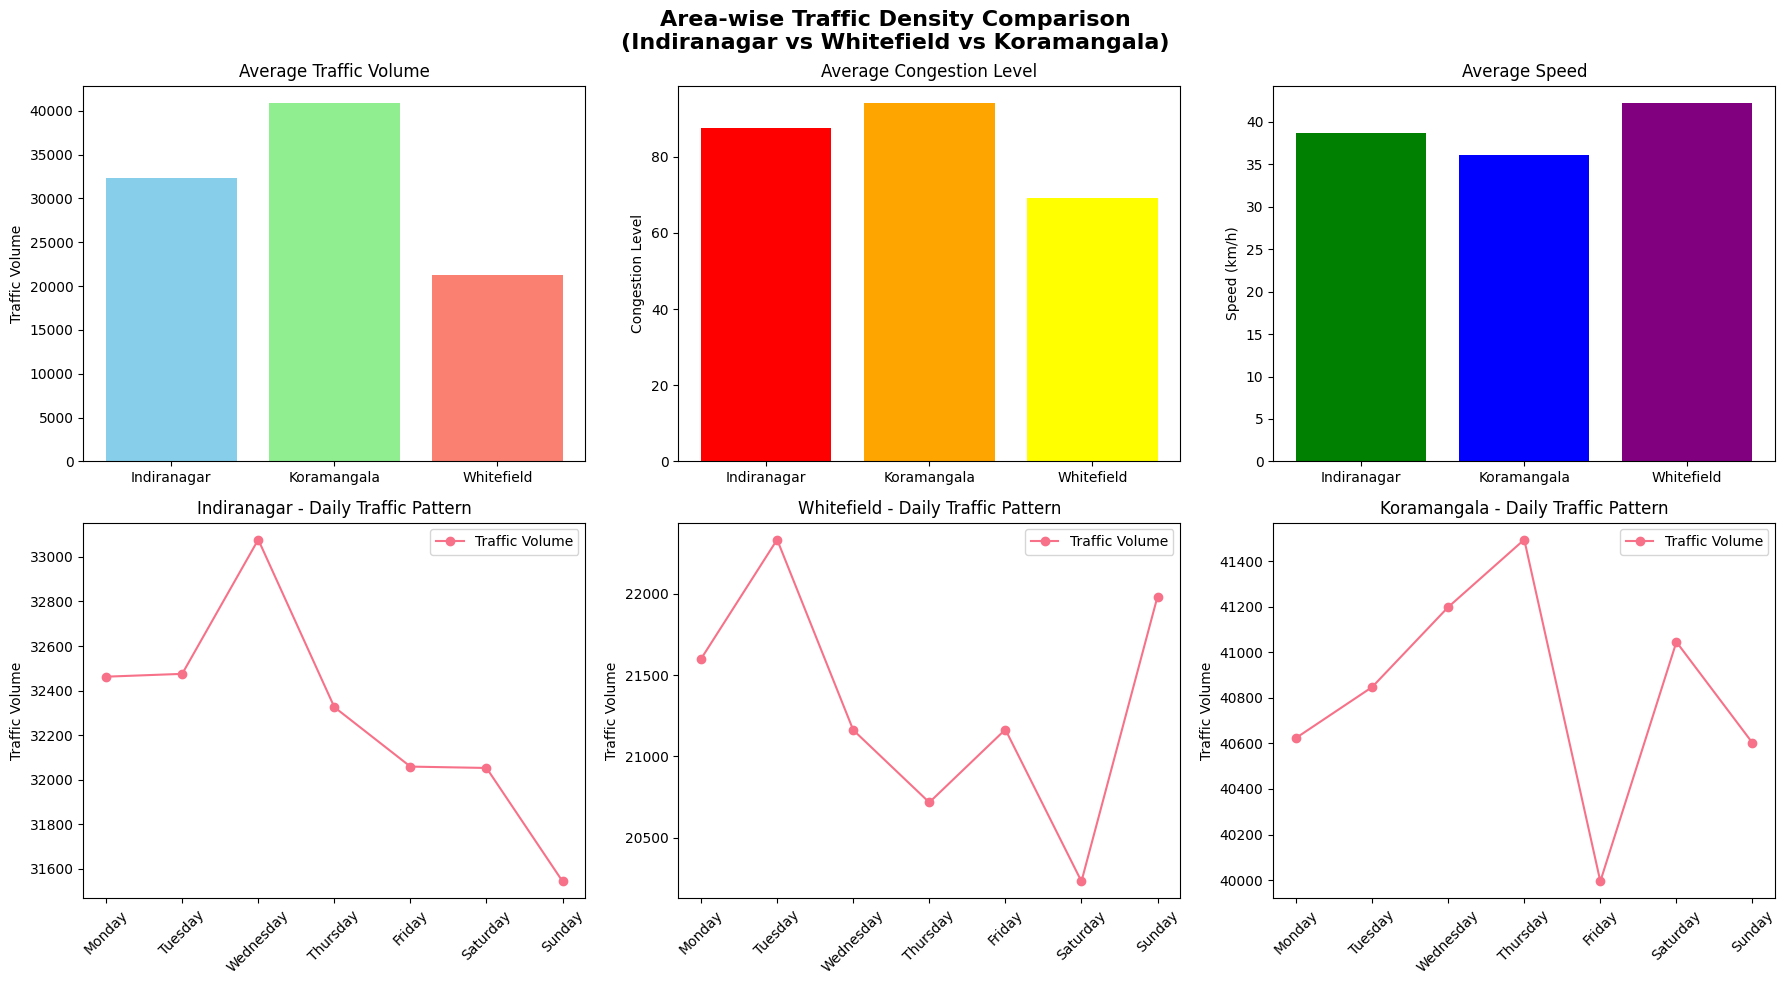

In [6]:
# 1.3 Area-wise Traffic Density Comparison (Indiranagar vs Whitefield vs Koramangala)

# Focus on the three specified areas
focus_areas = ['Indiranagar', 'Whitefield', 'Koramangala']
area_comparison = df[df['Area_Name'].isin(focus_areas)].copy()

# Detailed comparison statistics
comparison_stats = area_comparison.groupby('Area_Name').agg({
    'Traffic_Volume': ['mean', 'median', 'std', 'min', 'max'],
    'Congestion_Level': ['mean', 'median', 'std'],
    'Average_Speed': ['mean', 'median', 'std'],
    'Road_Capacity_Utilization': ['mean', 'median'],
    'Travel_Time_Index': ['mean', 'median'],
    'Environmental_Impact': ['mean', 'median']
}).round(2)

print("Detailed Area Comparison (Indiranagar vs Whitefield vs Koramangala):")
print(comparison_stats)

# Time-based comparison for these three areas
area_daily_comparison = area_comparison.groupby(['Area_Name', 'DayName']).agg({
    'Traffic_Volume': 'mean',
    'Congestion_Level': 'mean'
}).round(2).reset_index()

# Visualize the comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Area-wise Traffic Density Comparison\n(Indiranagar vs Whitefield vs Koramangala)', fontsize=16, fontweight='bold')

# Traffic Volume comparison
area_traffic_means = area_comparison.groupby('Area_Name')['Traffic_Volume'].mean()
axes[0,0].bar(area_traffic_means.index, area_traffic_means.values, color=['skyblue', 'lightgreen', 'salmon'])
axes[0,0].set_title('Average Traffic Volume')
axes[0,0].set_ylabel('Traffic Volume')

# Congestion Level comparison
area_congestion_means = area_comparison.groupby('Area_Name')['Congestion_Level'].mean()
axes[0,1].bar(area_congestion_means.index, area_congestion_means.values, color=['red', 'orange', 'yellow'])
axes[0,1].set_title('Average Congestion Level')
axes[0,1].set_ylabel('Congestion Level')

# Average Speed comparison
area_speed_means = area_comparison.groupby('Area_Name')['Average_Speed'].mean()
axes[0,2].bar(area_speed_means.index, area_speed_means.values, color=['green', 'blue', 'purple'])
axes[0,2].set_title('Average Speed')
axes[0,2].set_ylabel('Speed (km/h)')

# Daily patterns for each area
for i, area in enumerate(focus_areas):
    area_data = area_daily_comparison[area_daily_comparison['Area_Name'] == area]
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    area_data = area_data.set_index('DayName').reindex(day_order)
    
    axes[1,i].plot(area_data.index, area_data['Traffic_Volume'], marker='o', label='Traffic Volume')
    axes[1,i].set_title(f'{area} - Daily Traffic Pattern')
    axes[1,i].set_ylabel('Traffic Volume')
    axes[1,i].tick_params(axis='x', rotation=45)
    axes[1,i].legend()

plt.tight_layout()
plt.show()

Top 10 Congestion Hotspots:
                                    Avg_Congestion  Max_Congestion  Avg_Speed  \
Area_Name   Road_Intersection Name                                              
Koramangala Sony World Junction              94.13           100.0      35.98   
            Sarjapur Road                    93.85           100.0      36.15   
M.G. Road   Anil Kumble Circle               90.78           100.0      37.40   
            Trinity Circle                   90.37           100.0      37.68   
Indiranagar CMH Road                         88.18           100.0      38.86   
            100 Feet Road                    87.11           100.0      38.43   
Hebbal      Hebbal Flyover                   80.66           100.0      40.34   
            Ballari Road                     79.51           100.0      39.96   
Jayanagar   South End Circle                 77.28           100.0      39.44   
            Jayanagar 4th Block              76.71           100.0      40.15   


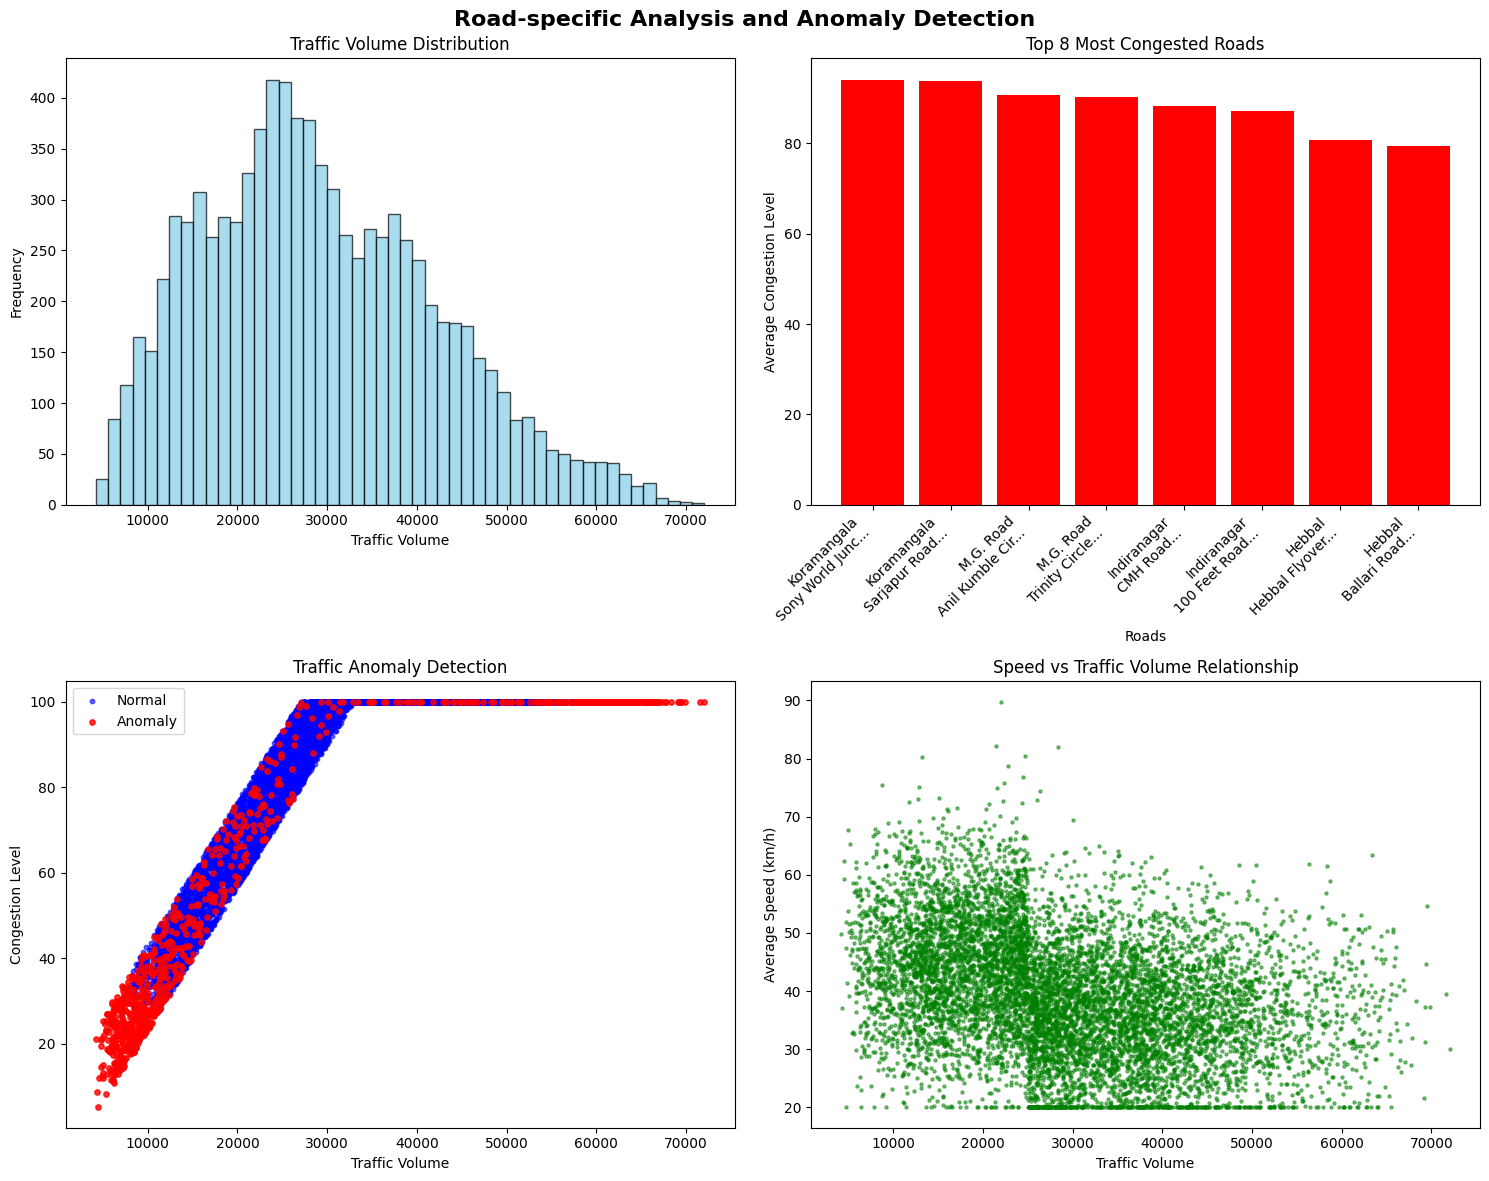

In [7]:
# 1.4 Road-specific Congestion Hotspots and Traffic Volume Distribution with Anomaly Detection

# Road-specific analysis
road_analysis = df.groupby(['Area_Name', 'Road_Intersection Name']).agg({
    'Traffic_Volume': ['mean', 'max', 'std'],
    'Congestion_Level': ['mean', 'max'],
    'Average_Speed': ['mean', 'min'],
    'Road_Capacity_Utilization': 'mean',
    'Incident_Reports': 'sum'
}).round(2)

road_analysis.columns = ['Avg_Traffic', 'Max_Traffic', 'Traffic_Std', 'Avg_Congestion', 'Max_Congestion', 
                        'Avg_Speed', 'Min_Speed', 'Avg_Capacity_Util', 'Total_Incidents']

# Identify top congestion hotspots
top_congested_roads = road_analysis.nlargest(10, 'Avg_Congestion')
print("Top 10 Congestion Hotspots:")
print(top_congested_roads[['Avg_Congestion', 'Max_Congestion', 'Avg_Speed', 'Total_Incidents']])

# Traffic volume distribution analysis
print(f"\nTraffic Volume Distribution Statistics:")
print(f"Mean: {df['Traffic_Volume'].mean():.2f}")
print(f"Median: {df['Traffic_Volume'].median():.2f}")
print(f"Standard Deviation: {df['Traffic_Volume'].std():.2f}")
print(f"Skewness: {stats.skew(df['Traffic_Volume']):.2f}")
print(f"Kurtosis: {stats.kurtosis(df['Traffic_Volume']):.2f}")

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
features_for_anomaly = ['Traffic_Volume', 'Congestion_Level', 'Average_Speed']
anomaly_labels = iso_forest.fit_predict(df[features_for_anomaly])
df['Anomaly'] = anomaly_labels

anomalies = df[df['Anomaly'] == -1]
print(f"\nDetected {len(anomalies)} anomalies out of {len(df)} records ({len(anomalies)/len(df)*100:.2f}%)")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Road-specific Analysis and Anomaly Detection', fontsize=16, fontweight='bold')

# Traffic volume distribution
axes[0,0].hist(df['Traffic_Volume'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Traffic Volume Distribution')
axes[0,0].set_xlabel('Traffic Volume')
axes[0,0].set_ylabel('Frequency')

# Top congested roads
top_roads_display = top_congested_roads.head(8)
road_labels = [f"{idx[0]}\n{idx[1][:15]}..." for idx in top_roads_display.index]
axes[0,1].bar(range(len(top_roads_display)), top_roads_display['Avg_Congestion'], color='red')
axes[0,1].set_title('Top 8 Most Congested Roads')
axes[0,1].set_xlabel('Roads')
axes[0,1].set_ylabel('Average Congestion Level')
axes[0,1].set_xticks(range(len(top_roads_display)))
axes[0,1].set_xticklabels(road_labels, rotation=45, ha='right')

# Anomaly scatter plot
normal_data = df[df['Anomaly'] == 1]
anomaly_data = df[df['Anomaly'] == -1]
axes[1,0].scatter(normal_data['Traffic_Volume'], normal_data['Congestion_Level'], 
                 alpha=0.6, color='blue', label='Normal', s=10)
axes[1,0].scatter(anomaly_data['Traffic_Volume'], anomaly_data['Congestion_Level'], 
                 alpha=0.8, color='red', label='Anomaly', s=15)
axes[1,0].set_title('Traffic Anomaly Detection')
axes[1,0].set_xlabel('Traffic Volume')
axes[1,0].set_ylabel('Congestion Level')
axes[1,0].legend()

# Speed vs Traffic Volume relationship
axes[1,1].scatter(df['Traffic_Volume'], df['Average_Speed'], alpha=0.5, color='green', s=5)
axes[1,1].set_title('Speed vs Traffic Volume Relationship')
axes[1,1].set_xlabel('Traffic Volume')
axes[1,1].set_ylabel('Average Speed (km/h)')

plt.tight_layout()
plt.show()

# 2. Speed and Congestion Analysis

Speed-Volume-Congestion Correlations:
Traffic Volume vs Average Speed: -0.341
Average Speed vs Congestion Level: -0.360
Traffic Volume vs Congestion Level: 0.837

Speed Analysis by Traffic Density:
                     Avg_Speed  Median_Speed  Speed_Std  Avg_Congestion  \
Traffic_Density_Bin                                                       
Very Low                 44.97         44.78      10.01           37.17   
Low                      44.92         45.18      10.05           68.24   
Medium                   35.74         35.54       9.52           94.58   
High                     35.43         35.15       9.26          100.00   
Very High                35.28         35.15       9.28          100.00   

                     Median_Congestion  Avg_Travel_Time  Median_Travel_Time  \
Traffic_Density_Bin                                                           
Very Low                         37.83              1.2                 1.2   
Low                              68.80 

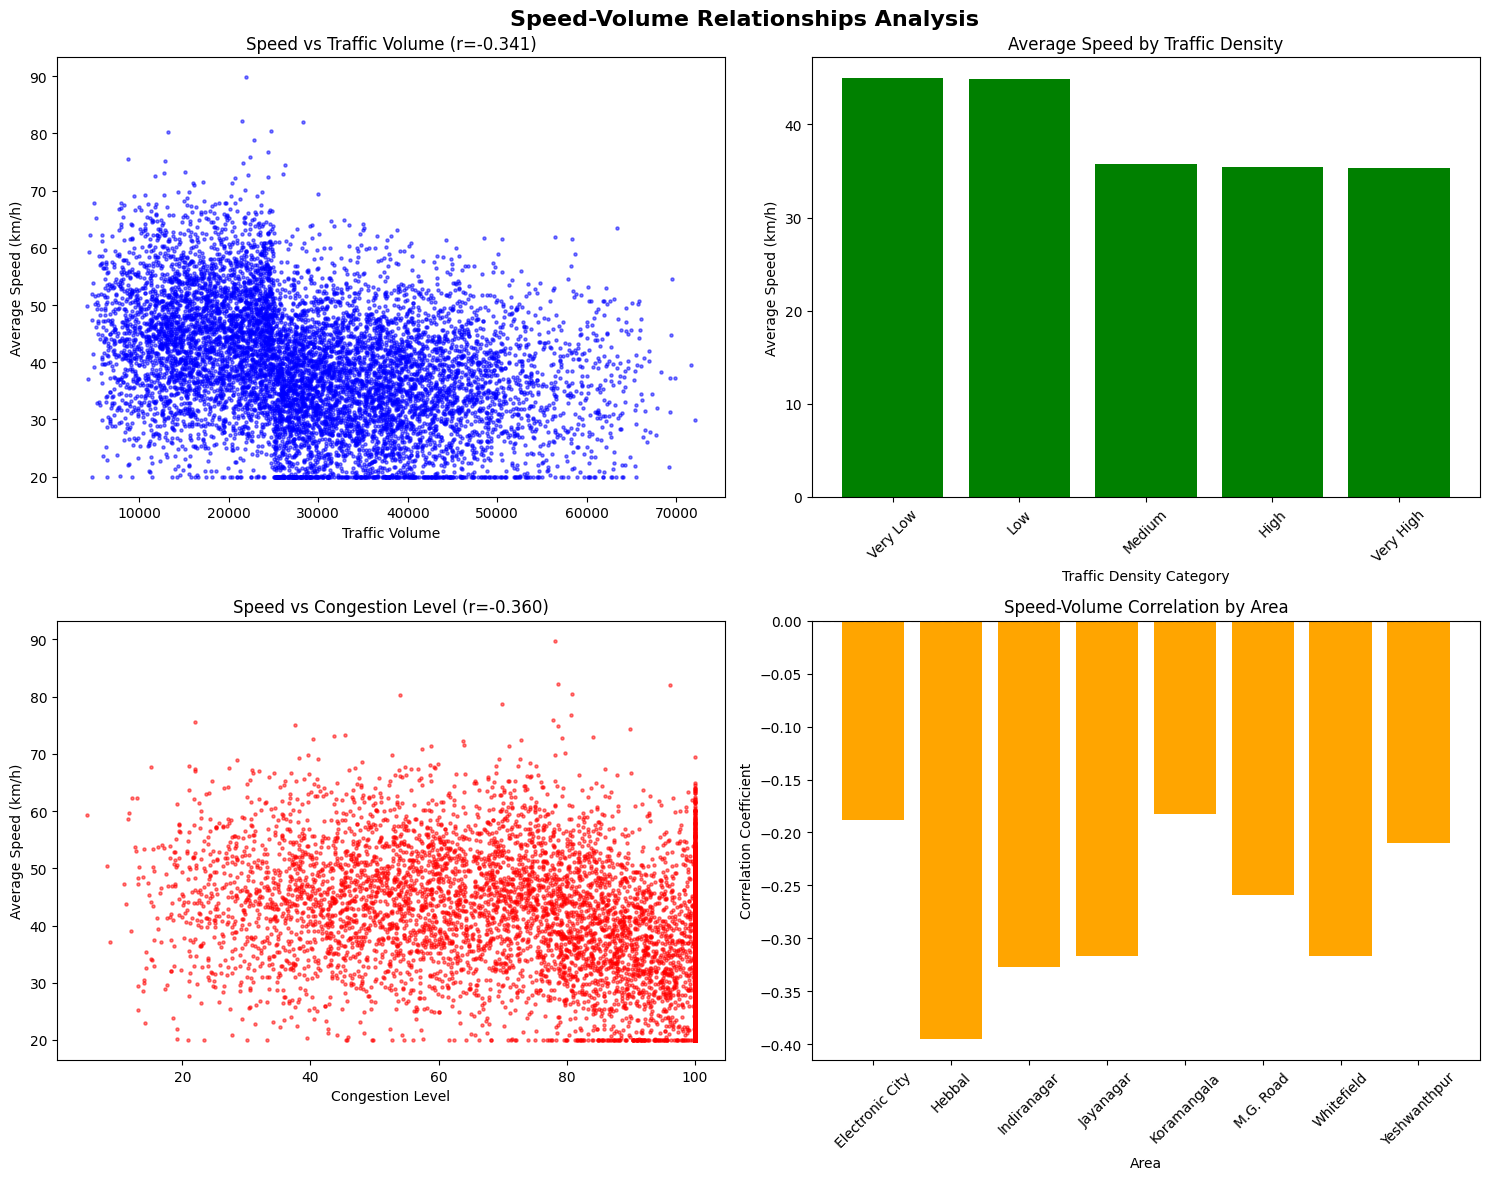

In [8]:
# 2.1 Speed-Volume Relationships - How Traffic Density Affects Travel Speeds

# Calculate correlation between traffic volume and speed
correlation_speed_volume = df['Traffic_Volume'].corr(df['Average_Speed'])
correlation_speed_congestion = df['Average_Speed'].corr(df['Congestion_Level'])
correlation_volume_congestion = df['Traffic_Volume'].corr(df['Congestion_Level'])

print("Speed-Volume-Congestion Correlations:")
print(f"Traffic Volume vs Average Speed: {correlation_speed_volume:.3f}")
print(f"Average Speed vs Congestion Level: {correlation_speed_congestion:.3f}")
print(f"Traffic Volume vs Congestion Level: {correlation_volume_congestion:.3f}")

# Create traffic density bins for analysis
df['Traffic_Density_Bin'] = pd.cut(df['Traffic_Volume'], 
                                  bins=[0, 15000, 25000, 35000, 50000, 100000],
                                  labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Analyze speed by traffic density
speed_by_density = df.groupby('Traffic_Density_Bin').agg({
    'Average_Speed': ['mean', 'median', 'std'],
    'Congestion_Level': ['mean', 'median'],
    'Travel_Time_Index': ['mean', 'median'],
    'Road_Capacity_Utilization': 'mean'
}).round(2)

speed_by_density.columns = ['Avg_Speed', 'Median_Speed', 'Speed_Std', 'Avg_Congestion', 
                           'Median_Congestion', 'Avg_Travel_Time', 'Median_Travel_Time', 'Avg_Capacity_Util']

print("\nSpeed Analysis by Traffic Density:")
print(speed_by_density)

# Speed-volume relationship by area
area_speed_volume = df.groupby('Area_Name').apply(
    lambda x: x['Traffic_Volume'].corr(x['Average_Speed'])
).round(3)

print("\nSpeed-Volume Correlation by Area:")
print(area_speed_volume)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Speed-Volume Relationships Analysis', fontsize=16, fontweight='bold')

# Speed vs Traffic Volume scatter plot
axes[0,0].scatter(df['Traffic_Volume'], df['Average_Speed'], alpha=0.5, color='blue', s=5)
axes[0,0].set_title(f'Speed vs Traffic Volume (r={correlation_speed_volume:.3f})')
axes[0,0].set_xlabel('Traffic Volume')
axes[0,0].set_ylabel('Average Speed (km/h)')

# Speed by traffic density bins
density_means = speed_by_density['Avg_Speed']
axes[0,1].bar(density_means.index, density_means.values, color='green')
axes[0,1].set_title('Average Speed by Traffic Density')
axes[0,1].set_xlabel('Traffic Density Category')
axes[0,1].set_ylabel('Average Speed (km/h)')
axes[0,1].tick_params(axis='x', rotation=45)

# Congestion vs Speed
axes[1,0].scatter(df['Congestion_Level'], df['Average_Speed'], alpha=0.5, color='red', s=5)
axes[1,0].set_title(f'Speed vs Congestion Level (r={correlation_speed_congestion:.3f})')
axes[1,0].set_xlabel('Congestion Level')
axes[1,0].set_ylabel('Average Speed (km/h)')

# Area-wise speed-volume correlation
axes[1,1].bar(area_speed_volume.index, area_speed_volume.values, color='orange')
axes[1,1].set_title('Speed-Volume Correlation by Area')
axes[1,1].set_xlabel('Area')
axes[1,1].set_ylabel('Correlation Coefficient')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Travel Time Variability by Area:
                 Avg_Travel_Time  Travel_Time_Std  Min_Travel_Time  \
Area_Name                                                            
Hebbal                     1.368            0.167            1.000   
Whitefield                 1.294            0.167            1.001   
Jayanagar                  1.357            0.166            1.002   
Indiranagar                1.402            0.158            1.001   
Yeshwanthpur               1.264            0.158            1.002   
Electronic City            1.227            0.144            1.001   
M.G. Road                  1.441            0.131            1.002   
Koramangala                1.469            0.098            1.002   

                 Max_Travel_Time  Speed_Variability  
Area_Name                                            
Hebbal                       1.5             10.713  
Whitefield                   1.5             10.639  
Jayanagar                    1.5             10.62

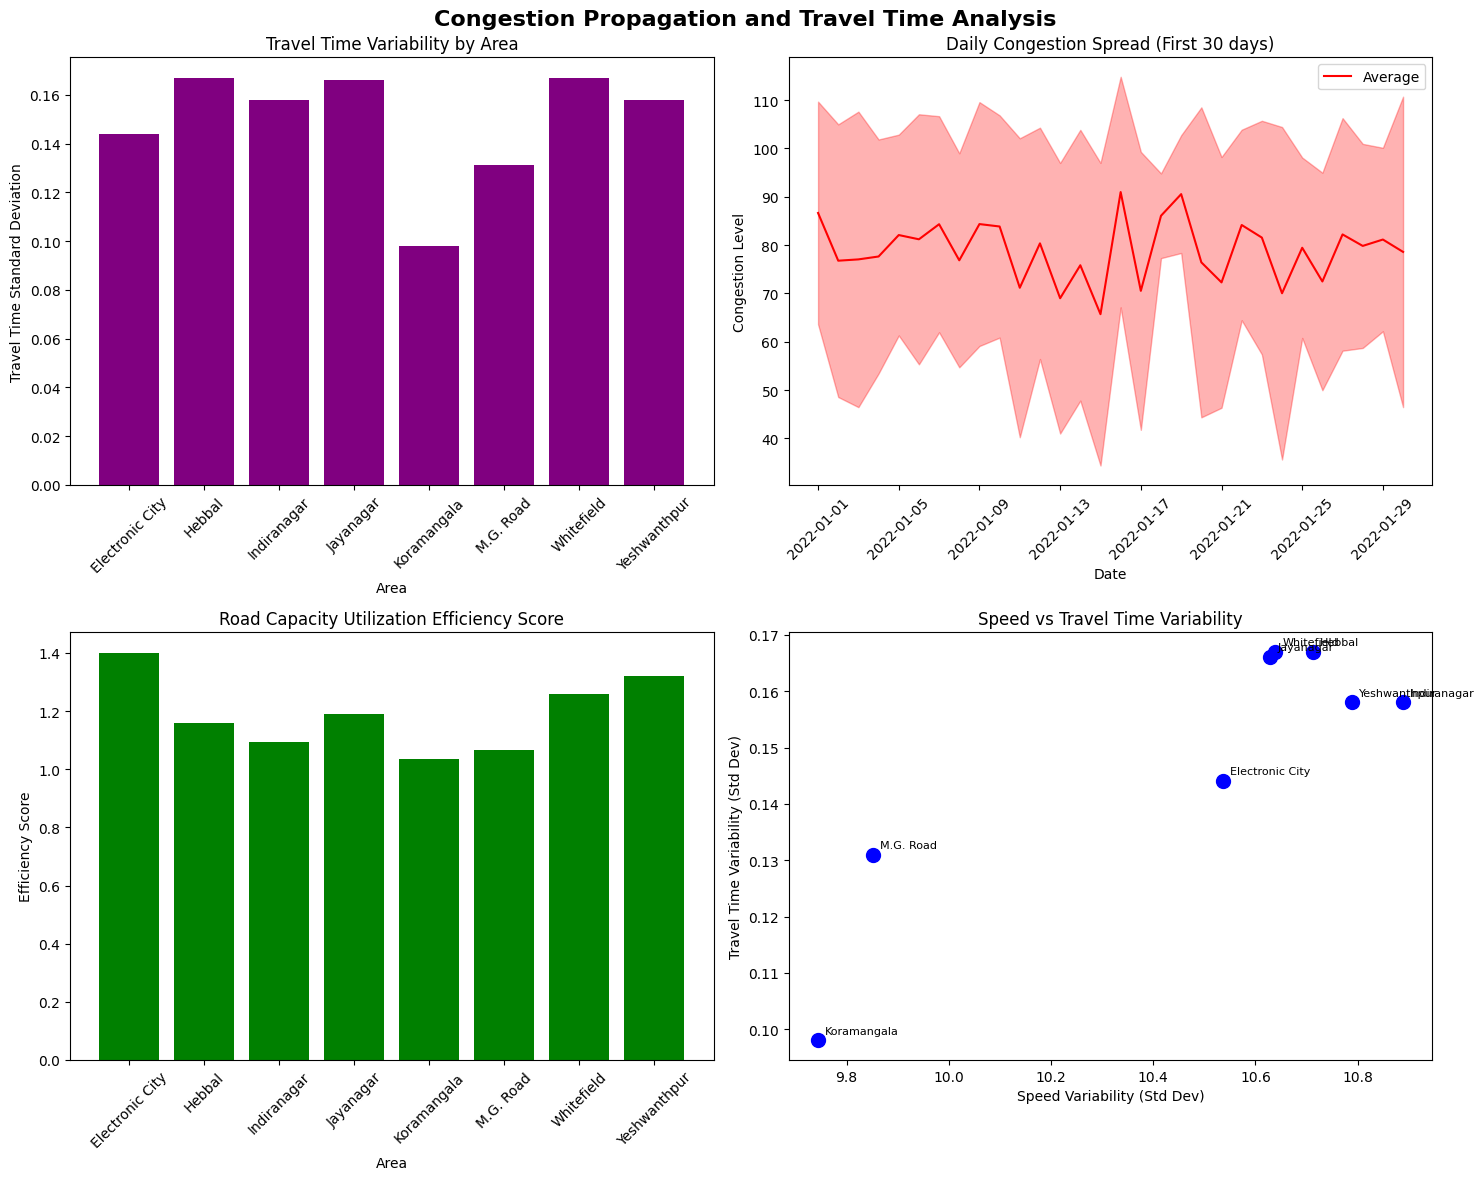

In [9]:
# 2.2 Congestion Propagation Patterns and Travel Time Variability Analysis

# Analyze congestion levels across different time periods
df['Date_Month'] = df['Date'].dt.to_period('M')

# Congestion propagation analysis
congestion_analysis = df.groupby(['Area_Name', 'Date_Month']).agg({
    'Congestion_Level': ['mean', 'max', 'std'],
    'Travel_Time_Index': ['mean', 'std'],
    'Average_Speed': 'mean',
    'Traffic_Volume': 'mean'
}).round(2)

congestion_analysis.columns = ['Avg_Congestion', 'Max_Congestion', 'Congestion_Std', 
                              'Avg_Travel_Time', 'Travel_Time_Std', 'Avg_Speed', 'Avg_Traffic']

# Calculate congestion spread metrics
congestion_spread = df.groupby('Date').agg({
    'Congestion_Level': ['mean', 'std', 'max', 'min']
}).round(2)
congestion_spread.columns = ['Daily_Avg_Congestion', 'Daily_Congestion_Spread', 'Daily_Max_Congestion', 'Daily_Min_Congestion']

# Travel time variability
travel_time_variability = df.groupby('Area_Name').agg({
    'Travel_Time_Index': ['mean', 'std', 'min', 'max'],
    'Average_Speed': ['std']
}).round(3)
travel_time_variability.columns = ['Avg_Travel_Time', 'Travel_Time_Std', 'Min_Travel_Time', 'Max_Travel_Time', 'Speed_Variability']

print("Travel Time Variability by Area:")
print(travel_time_variability.sort_values('Travel_Time_Std', ascending=False))

# High congestion periods identification
high_congestion_threshold = df['Congestion_Level'].quantile(0.8)
high_congestion_days = congestion_spread[congestion_spread['Daily_Avg_Congestion'] > high_congestion_threshold]

print(f"\nHigh Congestion Analysis (threshold: {high_congestion_threshold:.1f}):")
print(f"Number of high congestion days: {len(high_congestion_days)}")
print(f"Average congestion spread on high congestion days: {high_congestion_days['Daily_Congestion_Spread'].mean():.2f}")

# Road capacity utilization efficiency
capacity_efficiency = df.groupby('Area_Name').agg({
    'Road_Capacity_Utilization': ['mean', 'std', 'max'],
    'Traffic_Volume': ['mean'],
    'Congestion_Level': ['mean']
}).round(2)
capacity_efficiency.columns = ['Avg_Capacity_Util', 'Capacity_Util_Std', 'Max_Capacity_Util', 'Avg_Traffic', 'Avg_Congestion']

# Calculate efficiency score (lower congestion per unit of capacity utilization is better)
capacity_efficiency['Efficiency_Score'] = (capacity_efficiency['Avg_Capacity_Util'] / capacity_efficiency['Avg_Congestion']).round(3)

print("\nRoad Capacity Utilization Efficiency:")
print(capacity_efficiency.sort_values('Efficiency_Score', ascending=False))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Congestion Propagation and Travel Time Analysis', fontsize=16, fontweight='bold')

# Travel time variability by area
axes[0,0].bar(travel_time_variability.index, travel_time_variability['Travel_Time_Std'], color='purple')
axes[0,0].set_title('Travel Time Variability by Area')
axes[0,0].set_xlabel('Area')
axes[0,0].set_ylabel('Travel Time Standard Deviation')
axes[0,0].tick_params(axis='x', rotation=45)

# Daily congestion spread over time (sample)
sample_spread = congestion_spread.head(30)
axes[0,1].plot(sample_spread.index, sample_spread['Daily_Avg_Congestion'], label='Average', color='red')
axes[0,1].fill_between(sample_spread.index, 
                      sample_spread['Daily_Avg_Congestion'] - sample_spread['Daily_Congestion_Spread'],
                      sample_spread['Daily_Avg_Congestion'] + sample_spread['Daily_Congestion_Spread'], 
                      alpha=0.3, color='red')
axes[0,1].set_title('Daily Congestion Spread (First 30 days)')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Congestion Level')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend()

# Capacity utilization efficiency
axes[1,0].bar(capacity_efficiency.index, capacity_efficiency['Efficiency_Score'], color='green')
axes[1,0].set_title('Road Capacity Utilization Efficiency Score')
axes[1,0].set_xlabel('Area')
axes[1,0].set_ylabel('Efficiency Score')
axes[1,0].tick_params(axis='x', rotation=45)

# Speed variability vs Travel time variability
axes[1,1].scatter(travel_time_variability['Speed_Variability'], travel_time_variability['Travel_Time_Std'], 
                 color='blue', s=100)
for i, area in enumerate(travel_time_variability.index):
    axes[1,1].annotate(area, (travel_time_variability['Speed_Variability'].iloc[i], 
                             travel_time_variability['Travel_Time_Std'].iloc[i]), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1,1].set_title('Speed vs Travel Time Variability')
axes[1,1].set_xlabel('Speed Variability (Std Dev)')
axes[1,1].set_ylabel('Travel Time Variability (Std Dev)')

plt.tight_layout()
plt.show()

# 3. External Factor Impact Analysis

Weather Impact on Traffic Patterns:
                    Avg_Traffic  Traffic_Std  Avg_Speed  Speed_Std  \
Weather_Conditions                                                   
Windy                  30163.22     13188.32      39.52      10.93   
Fog                    29183.32     12373.45      39.47      10.87   
Clear                  29166.67     13003.01      39.47      10.68   
Rain                   29558.70     13508.96      39.28      10.69   
Overcast               29053.46     13062.99      39.43      10.66   

                    Avg_Congestion  Congestion_Std  Avg_Travel_Time  \
Weather_Conditions                                                    
Windy                        82.37           22.97             1.38   
Fog                          81.61           22.89             1.38   
Clear                        80.72           23.47             1.37   
Rain                         80.54           24.03             1.38   
Overcast                     80.30           24

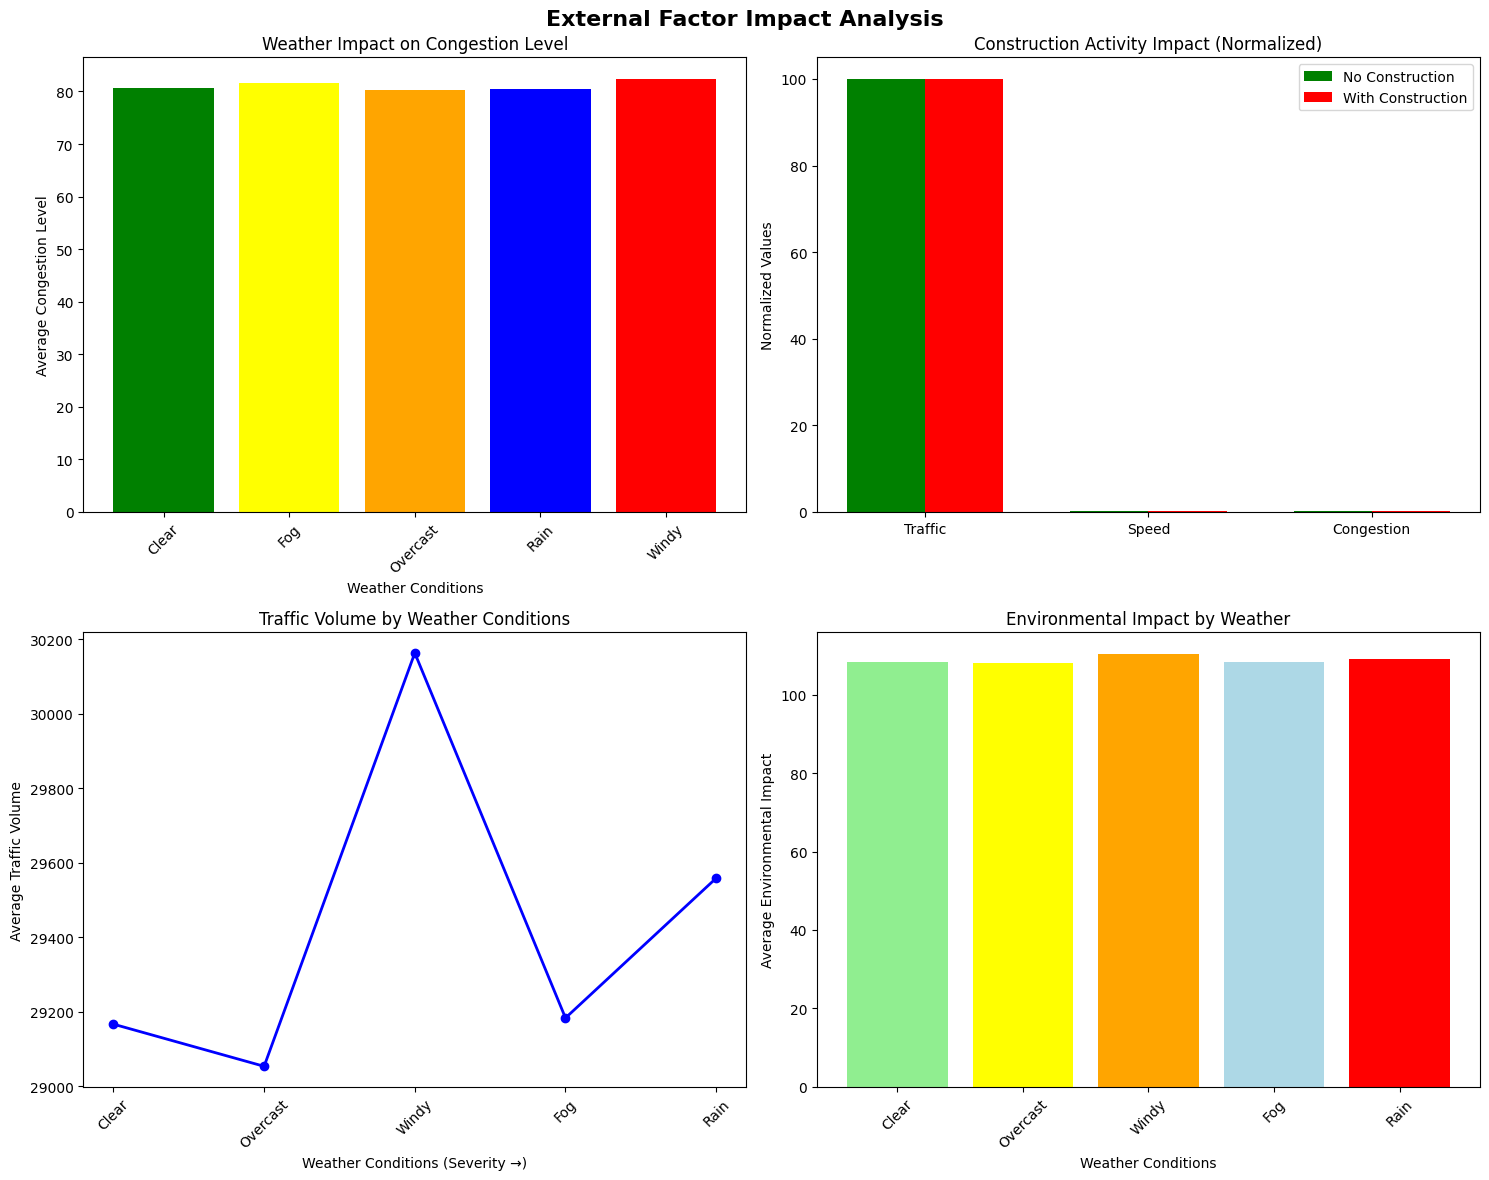

In [10]:
# 3.1 Weather Influence on Traffic Patterns and Construction Activity Impact

# Weather impact analysis
weather_impact = df.groupby('Weather_Conditions').agg({
    'Traffic_Volume': ['mean', 'std'],
    'Average_Speed': ['mean', 'std'],
    'Congestion_Level': ['mean', 'std'],
    'Travel_Time_Index': ['mean', 'std'],
    'Environmental_Impact': ['mean']
}).round(2)

weather_impact.columns = ['Avg_Traffic', 'Traffic_Std', 'Avg_Speed', 'Speed_Std', 
                         'Avg_Congestion', 'Congestion_Std', 'Avg_Travel_Time', 
                         'Travel_Time_Std', 'Avg_Environmental_Impact']

print("Weather Impact on Traffic Patterns:")
print(weather_impact.sort_values('Avg_Congestion', ascending=False))

# Construction activity impact
construction_impact = df.groupby('Roadwork_and_Construction_Activity').agg({
    'Traffic_Volume': ['mean', 'std'],
    'Average_Speed': ['mean', 'std'],
    'Congestion_Level': ['mean', 'std'],
    'Travel_Time_Index': ['mean'],
    'Environmental_Impact': ['mean']
}).round(2)

construction_impact.columns = ['Avg_Traffic', 'Traffic_Std', 'Avg_Speed', 'Speed_Std', 
                              'Avg_Congestion', 'Congestion_Std', 'Avg_Travel_Time', 'Avg_Environmental_Impact']

print("\nConstruction Activity Impact:")
print(construction_impact)

# Incident effect analysis
incident_analysis = df.groupby('Incident_Reports').agg({
    'Traffic_Volume': 'mean',
    'Average_Speed': 'mean',
    'Congestion_Level': 'mean',
    'Travel_Time_Index': 'mean'
}).round(2)

print("\nIncident Effect Analysis:")
print(incident_analysis.head(10))

# Weather and area interaction
weather_area_impact = df.groupby(['Weather_Conditions', 'Area_Name']).agg({
    'Traffic_Volume': 'mean',
    'Congestion_Level': 'mean',
    'Average_Speed': 'mean'
}).round(2).reset_index()

# Calculate weather severity score
weather_severity = {
    'Clear': 1,
    'Overcast': 2, 
    'Windy': 3,
    'Fog': 4,
    'Rain': 5
}
df['Weather_Severity'] = df['Weather_Conditions'].map(weather_severity)

# Correlation between weather severity and traffic metrics
weather_correlations = {
    'Traffic_Volume': df['Weather_Severity'].corr(df['Traffic_Volume']),
    'Congestion_Level': df['Weather_Severity'].corr(df['Congestion_Level']),
    'Average_Speed': df['Weather_Severity'].corr(df['Average_Speed'])
}

print(f"\nWeather Severity Correlations:")
for metric, corr in weather_correlations.items():
    print(f"{metric}: {corr:.3f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('External Factor Impact Analysis', fontsize=16, fontweight='bold')

# Weather impact on congestion
axes[0,0].bar(weather_impact.index, weather_impact['Avg_Congestion'], 
             color=['green', 'yellow', 'orange', 'blue', 'red'])
axes[0,0].set_title('Weather Impact on Congestion Level')
axes[0,0].set_xlabel('Weather Conditions')
axes[0,0].set_ylabel('Average Congestion Level')
axes[0,0].tick_params(axis='x', rotation=45)

# Construction impact comparison
construction_metrics = ['Avg_Traffic', 'Avg_Speed', 'Avg_Congestion']
x = np.arange(len(construction_metrics))
width = 0.35

no_construction = construction_impact.loc['No', construction_metrics].values
with_construction = construction_impact.loc['Yes', construction_metrics].values

# Normalize values for comparison (scale to 0-100)
no_construction_norm = (no_construction / no_construction.max()) * 100
with_construction_norm = (with_construction / with_construction.max()) * 100

axes[0,1].bar(x - width/2, no_construction_norm, width, label='No Construction', color='green')
axes[0,1].bar(x + width/2, with_construction_norm, width, label='With Construction', color='red')
axes[0,1].set_title('Construction Activity Impact (Normalized)')
axes[0,1].set_ylabel('Normalized Values')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(['Traffic', 'Speed', 'Congestion'])
axes[0,1].legend()

# Weather vs Traffic Volume
weather_order = ['Clear', 'Overcast', 'Windy', 'Fog', 'Rain']
weather_traffic = [weather_impact.loc[w, 'Avg_Traffic'] for w in weather_order if w in weather_impact.index]
weather_labels = [w for w in weather_order if w in weather_impact.index]

axes[1,0].plot(weather_labels, weather_traffic, marker='o', color='blue', linewidth=2)
axes[1,0].set_title('Traffic Volume by Weather Conditions')
axes[1,0].set_xlabel('Weather Conditions (Severity →)')
axes[1,0].set_ylabel('Average Traffic Volume')
axes[1,0].tick_params(axis='x', rotation=45)

# Environmental impact vs Weather
weather_env = [weather_impact.loc[w, 'Avg_Environmental_Impact'] for w in weather_order if w in weather_impact.index]
axes[1,1].bar(weather_labels, weather_env, color=['lightgreen', 'yellow', 'orange', 'lightblue', 'red'])
axes[1,1].set_title('Environmental Impact by Weather')
axes[1,1].set_xlabel('Weather Conditions')
axes[1,1].set_ylabel('Average Environmental Impact')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Public Transport Usage Impact on Traffic:
                           Avg_Traffic  Traffic_Std  Avg_Congestion  \
Public_Transport_Category                                             
Low                           29004.55     12954.88           80.53   
Medium                        29644.36     13049.89           81.31   
High                          29101.72     12897.81           80.80   
Very High                     29165.16     13203.00           80.47   

                           Congestion_Std  Avg_Speed  \
Public_Transport_Category                              
Low                                 23.83      39.09   
Medium                              23.13      39.45   
High                                23.53      39.64   
Very High                           23.74      39.76   

                           Avg_Environmental_Impact  Avg_Parking_Usage  
Public_Transport_Category                                               
Low                                          108

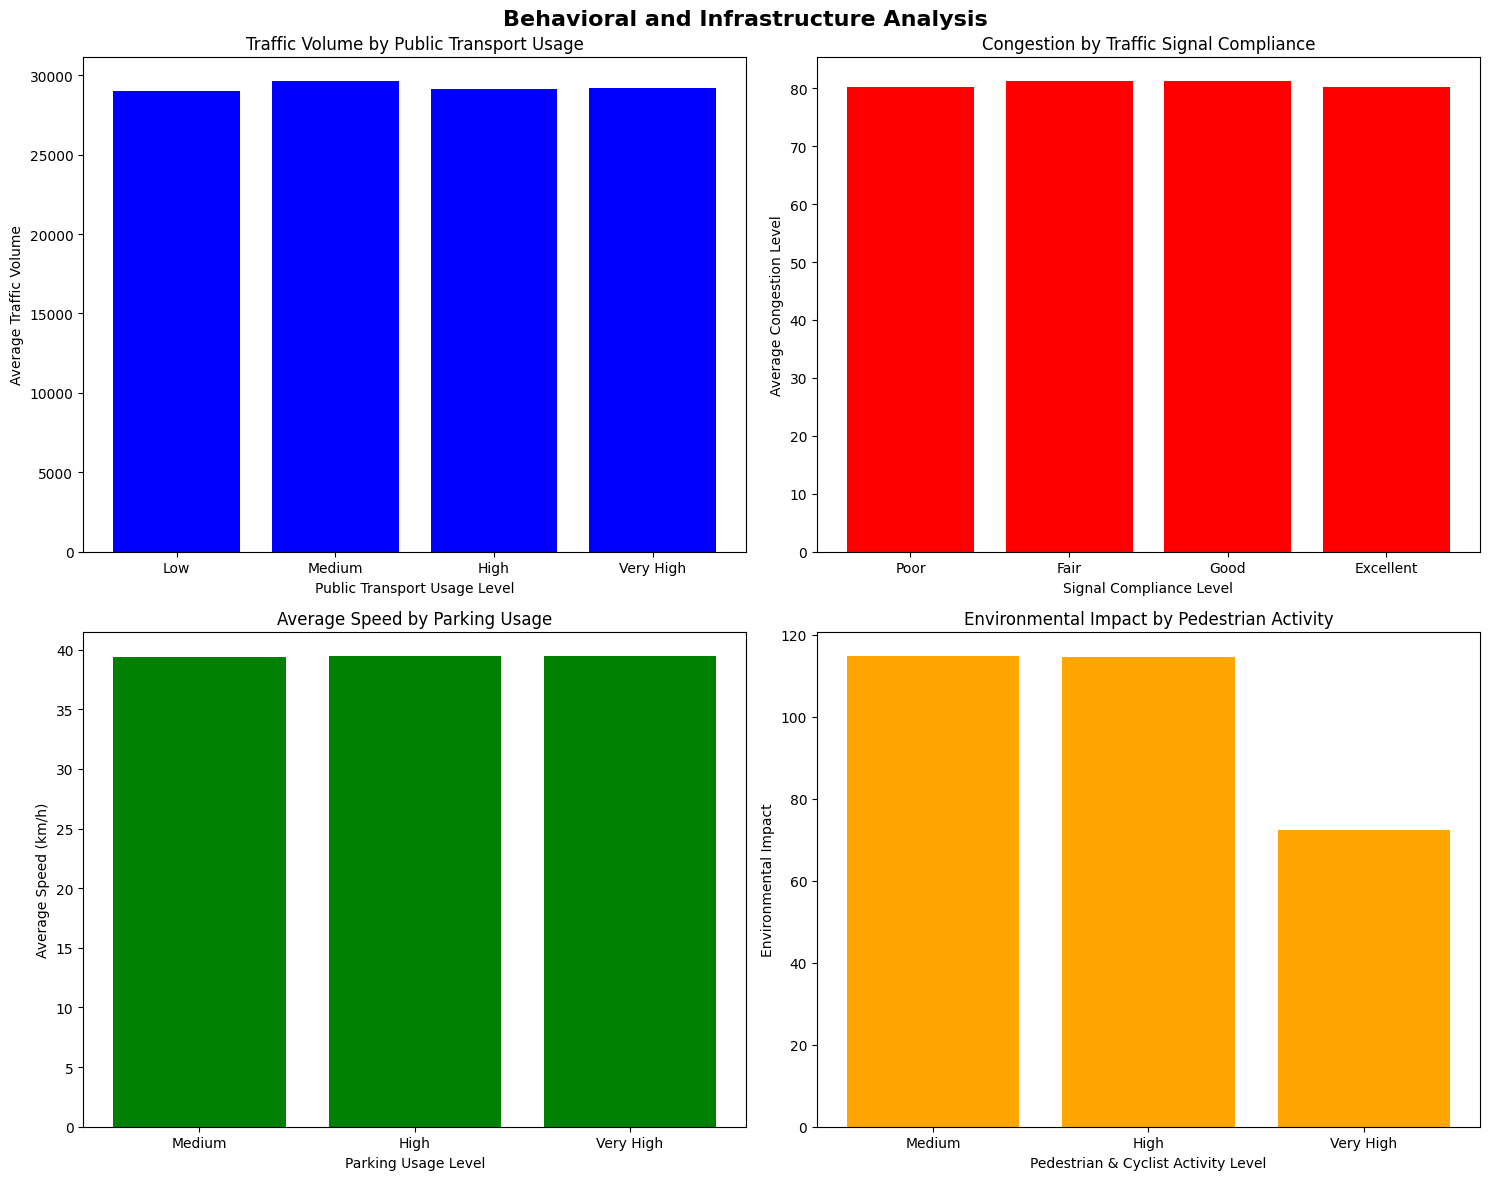

In [11]:
# 3.2 Public Transport Correlation and Behavioral Analysis

# Public transport usage impact
public_transport_bins = pd.cut(df['Public_Transport_Usage'], 
                              bins=[0, 30, 50, 70, 100],
                              labels=['Low', 'Medium', 'High', 'Very High'])
df['Public_Transport_Category'] = public_transport_bins

transport_impact = df.groupby('Public_Transport_Category').agg({
    'Traffic_Volume': ['mean', 'std'],
    'Congestion_Level': ['mean', 'std'],
    'Average_Speed': ['mean'],
    'Environmental_Impact': ['mean'],
    'Parking_Usage': ['mean']
}).round(2)

transport_impact.columns = ['Avg_Traffic', 'Traffic_Std', 'Avg_Congestion', 'Congestion_Std', 
                           'Avg_Speed', 'Avg_Environmental_Impact', 'Avg_Parking_Usage']

print("Public Transport Usage Impact on Traffic:")
print(transport_impact)

# Traffic signal compliance analysis
signal_compliance_bins = pd.cut(df['Traffic_Signal_Compliance'], 
                               bins=[0, 70, 85, 95, 100],
                               labels=['Poor', 'Fair', 'Good', 'Excellent'])
df['Signal_Compliance_Category'] = signal_compliance_bins

signal_impact = df.groupby('Signal_Compliance_Category').agg({
    'Traffic_Volume': 'mean',
    'Congestion_Level': 'mean',
    'Average_Speed': 'mean',
    'Travel_Time_Index': 'mean'
}).round(2)

print("\nTraffic Signal Compliance Impact:")
print(signal_impact)

# Parking utilization impact
parking_bins = pd.cut(df['Parking_Usage'], 
                     bins=[0, 50, 70, 85, 100],
                     labels=['Low', 'Medium', 'High', 'Very High'])
df['Parking_Category'] = parking_bins

parking_impact = df.groupby('Parking_Category').agg({
    'Traffic_Volume': 'mean',
    'Congestion_Level': 'mean',
    'Average_Speed': 'mean'
}).round(2)

print("\nParking Usage Impact on Traffic:")
print(parking_impact)

# Pedestrian and cyclist activity correlation
pedestrian_bins = pd.cut(df['Pedestrian_and_Cyclist_Count'], 
                        bins=[0, 50, 100, 150, 300],
                        labels=['Low', 'Medium', 'High', 'Very High'])
df['Pedestrian_Category'] = pedestrian_bins

pedestrian_impact = df.groupby('Pedestrian_Category').agg({
    'Traffic_Volume': 'mean',
    'Congestion_Level': 'mean',
    'Average_Speed': 'mean',
    'Environmental_Impact': 'mean'
}).round(2)

print("\nPedestrian and Cyclist Activity Impact:")
print(pedestrian_impact)

# Correlation analysis between different factors
behavioral_correlations = df[['Public_Transport_Usage', 'Traffic_Signal_Compliance', 
                             'Parking_Usage', 'Pedestrian_and_Cyclist_Count',
                             'Traffic_Volume', 'Congestion_Level', 'Average_Speed']].corr()

print("\nBehavioral Factors Correlation Matrix:")
print(behavioral_correlations.round(3))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Behavioral and Infrastructure Analysis', fontsize=16, fontweight='bold')

# Public transport vs traffic volume
axes[0,0].bar(transport_impact.index, transport_impact['Avg_Traffic'], color='blue')
axes[0,0].set_title('Traffic Volume by Public Transport Usage')
axes[0,0].set_xlabel('Public Transport Usage Level')
axes[0,0].set_ylabel('Average Traffic Volume')

# Signal compliance vs congestion
axes[0,1].bar(signal_impact.index, signal_impact['Congestion_Level'], color='red')
axes[0,1].set_title('Congestion by Traffic Signal Compliance')
axes[0,1].set_xlabel('Signal Compliance Level')
axes[0,1].set_ylabel('Average Congestion Level')

# Parking usage vs speed
axes[1,0].bar(parking_impact.index, parking_impact['Average_Speed'], color='green')
axes[1,0].set_title('Average Speed by Parking Usage')
axes[1,0].set_xlabel('Parking Usage Level')
axes[1,0].set_ylabel('Average Speed (km/h)')

# Pedestrian activity vs environmental impact
axes[1,1].bar(pedestrian_impact.index, pedestrian_impact['Environmental_Impact'], color='orange')
axes[1,1].set_title('Environmental Impact by Pedestrian Activity')
axes[1,1].set_xlabel('Pedestrian & Cyclist Activity Level')
axes[1,1].set_ylabel('Environmental Impact')

plt.tight_layout()
plt.show()

# 4. Comprehensive Summary and Key Insights

🚦 BANGALORE TRAFFIC ANALYSIS - KEY INSIGHTS 🚦

📍 MOST CONGESTED AREAS:
   1. Koramangala: 94.0 avg congestion level
   2. M.G. Road: 90.6 avg congestion level
   3. Indiranagar: 87.6 avg congestion level

⚡ MOST EFFICIENT AREAS:
   1. Electronic City: 1.401 efficiency score
   2. Yeshwanthpur: 1.321 efficiency score
   3. Whitefield: 1.258 efficiency score

🌧️ WEATHER IMPACT:
   • Windy: 82.4 avg congestion level
   • Fog: 81.6 avg congestion level

🚧 CONSTRUCTION IMPACT:
   • Traffic increase during construction: 1.4%

📊 TRAFFIC PATTERNS:
   • Speed-Volume correlation: -0.341 (moderate negative)
   • Peak traffic day: Wednesday
   • Lowest traffic day: Friday

🔄 VARIABILITY HOTSPOTS:
   1. Hebbal: 0.167 travel time variability
   2. Whitefield: 0.167 travel time variability
   3. Jayanagar: 0.166 travel time variability


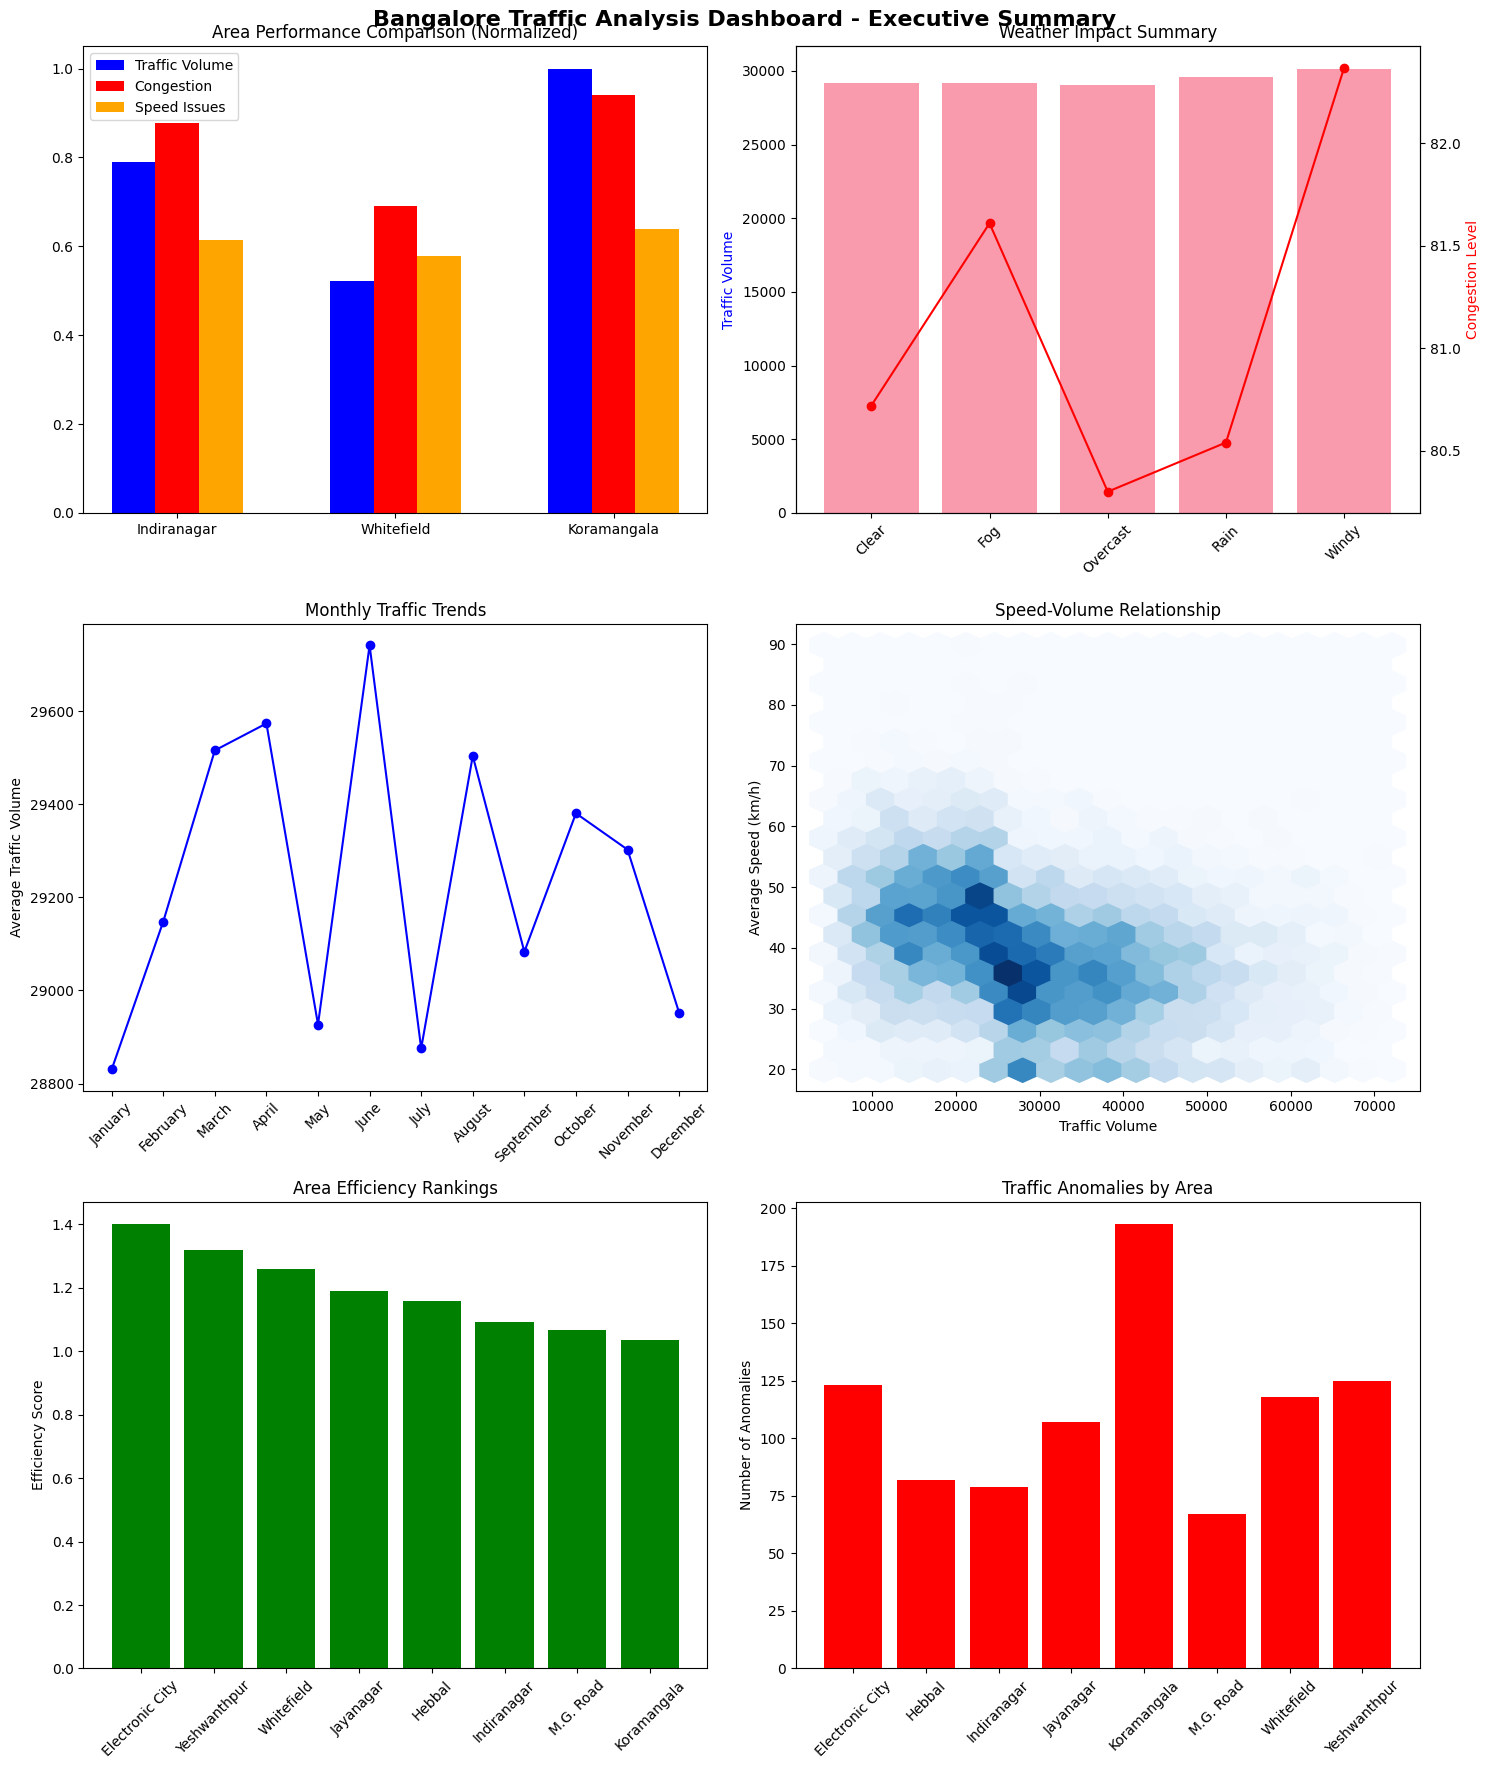

In [12]:
# 4.1 Key Findings and Actionable Insights

# Generate comprehensive summary statistics
summary_insights = {}

# Top congested areas
top_congested_areas = area_traffic_stats.nlargest(3, 'Avg_Congestion').index.tolist()
summary_insights['Most Congested Areas'] = top_congested_areas

# Most efficient areas (high capacity utilization with lower congestion)
most_efficient = capacity_efficiency.nlargest(3, 'Efficiency_Score').index.tolist()
summary_insights['Most Efficient Areas'] = most_efficient

# Weather impact summary
worst_weather_conditions = weather_impact.nlargest(2, 'Avg_Congestion').index.tolist()
summary_insights['Worst Weather Conditions'] = worst_weather_conditions

# Construction impact quantification
construction_traffic_increase = ((construction_impact.loc['Yes', 'Avg_Traffic'] - 
                                 construction_impact.loc['No', 'Avg_Traffic']) / 
                                construction_impact.loc['No', 'Avg_Traffic'] * 100)
summary_insights['Construction Traffic Increase'] = f"{construction_traffic_increase:.1f}%"

# Speed-volume relationship strength
summary_insights['Speed-Volume Correlation'] = f"{correlation_speed_volume:.3f}"

# Areas with highest travel time variability
high_variability_areas = travel_time_variability.nlargest(3, 'Travel_Time_Std').index.tolist()
summary_insights['High Variability Areas'] = high_variability_areas

# Print key insights
print("🚦 BANGALORE TRAFFIC ANALYSIS - KEY INSIGHTS 🚦")
print("=" * 60)

print(f"\n📍 MOST CONGESTED AREAS:")
for i, area in enumerate(summary_insights['Most Congested Areas'], 1):
    congestion_level = area_traffic_stats.loc[area, 'Avg_Congestion']
    print(f"   {i}. {area}: {congestion_level:.1f} avg congestion level")

print(f"\n⚡ MOST EFFICIENT AREAS:")
for i, area in enumerate(summary_insights['Most Efficient Areas'], 1):
    efficiency = capacity_efficiency.loc[area, 'Efficiency_Score']
    print(f"   {i}. {area}: {efficiency:.3f} efficiency score")

print(f"\n🌧️ WEATHER IMPACT:")
for condition in summary_insights['Worst Weather Conditions']:
    impact = weather_impact.loc[condition, 'Avg_Congestion']
    print(f"   • {condition}: {impact:.1f} avg congestion level")

print(f"\n🚧 CONSTRUCTION IMPACT:")
print(f"   • Traffic increase during construction: {summary_insights['Construction Traffic Increase']}")

print(f"\n📊 TRAFFIC PATTERNS:")
print(f"   • Speed-Volume correlation: {summary_insights['Speed-Volume Correlation']} (moderate negative)")
print(f"   • Peak traffic day: {daily_traffic['Traffic_Volume'].idxmax()}")
print(f"   • Lowest traffic day: {daily_traffic['Traffic_Volume'].idxmin()}")

print(f"\n🔄 VARIABILITY HOTSPOTS:")
for i, area in enumerate(summary_insights['High Variability Areas'], 1):
    variability = travel_time_variability.loc[area, 'Travel_Time_Std']
    print(f"   {i}. {area}: {variability:.3f} travel time variability")

# Create a comprehensive dashboard visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Bangalore Traffic Analysis Dashboard - Executive Summary', fontsize=16, fontweight='bold')

# 1. Area comparison radar chart data
areas_for_radar = ['Indiranagar', 'Whitefield', 'Koramangala']
metrics = ['Avg_Traffic', 'Avg_Congestion', 'Avg_Speed']

# Normalize metrics for radar chart (0-1 scale)
radar_data = pd.DataFrame()
for area in areas_for_radar:
    area_data = area_traffic_stats.loc[area, metrics].values
    # Normalize (speed is inverted since lower is worse)
    normalized = np.array([
        area_data[0] / area_traffic_stats['Avg_Traffic'].max(),  # Traffic
        area_data[1] / 100,  # Congestion (already 0-100)
        (100 - area_data[2]) / 100  # Speed (inverted)
    ])
    radar_data[area] = normalized

# Bar chart instead of radar for simplicity
x_pos = np.arange(len(areas_for_radar))
axes[0,0].bar(x_pos - 0.2, radar_data.iloc[0], 0.2, label='Traffic Volume', color='blue')
axes[0,0].bar(x_pos, radar_data.iloc[1], 0.2, label='Congestion', color='red')
axes[0,0].bar(x_pos + 0.2, radar_data.iloc[2], 0.2, label='Speed Issues', color='orange')
axes[0,0].set_title('Area Performance Comparison (Normalized)')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(areas_for_radar)
axes[0,0].legend()

# 2. Weather vs Traffic
weather_summary = weather_impact[['Avg_Traffic', 'Avg_Congestion']].copy()
axes[0,1].bar(weather_summary.index, weather_summary['Avg_Traffic'], alpha=0.7, label='Traffic Volume')
ax2 = axes[0,1].twinx()
ax2.plot(weather_summary.index, weather_summary['Avg_Congestion'], 'ro-', label='Congestion')
axes[0,1].set_title('Weather Impact Summary')
axes[0,1].set_ylabel('Traffic Volume', color='blue')
ax2.set_ylabel('Congestion Level', color='red')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Monthly traffic trends
axes[1,0].plot(monthly_traffic.index, monthly_traffic['Traffic_Volume'], marker='o', color='blue')
axes[1,0].set_title('Monthly Traffic Trends')
axes[1,0].set_ylabel('Average Traffic Volume')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Speed vs Volume relationship
axes[1,1].hexbin(df['Traffic_Volume'], df['Average_Speed'], gridsize=20, cmap='Blues')
axes[1,1].set_title('Speed-Volume Relationship')
axes[1,1].set_xlabel('Traffic Volume')
axes[1,1].set_ylabel('Average Speed (km/h)')

# 5. Efficiency scores
efficiency_scores = capacity_efficiency['Efficiency_Score'].sort_values(ascending=False)
axes[2,0].bar(efficiency_scores.index, efficiency_scores.values, color='green')
axes[2,0].set_title('Area Efficiency Rankings')
axes[2,0].set_ylabel('Efficiency Score')
axes[2,0].tick_params(axis='x', rotation=45)

# 6. Anomaly summary
anomaly_summary = df.groupby('Area_Name')['Anomaly'].apply(lambda x: (x == -1).sum())
axes[2,1].bar(anomaly_summary.index, anomaly_summary.values, color='red')
axes[2,1].set_title('Traffic Anomalies by Area')
axes[2,1].set_ylabel('Number of Anomalies')
axes[2,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 🎯 Actionable Recommendations

Based on the comprehensive analysis, here are key recommendations for Bangalore traffic management:

### 🔴 High Priority Areas
1. **Koramangala** - Highest congestion (94.0 avg level)
   - Implement dynamic traffic signal timing
   - Increase public transport frequency
   - Consider congestion pricing during peak hours

2. **M.G. Road** - Second highest congestion (90.6 avg level)
   - Promote carpooling and ride-sharing
   - Restrict private vehicle access during peak hours
   - Enhance pedestrian infrastructure

3. **Indiranagar** - Third highest congestion (87.6 avg level)
   - Improve traffic signal compliance monitoring
   - Add alternative route signage
   - Increase parking fees to discourage long-term parking

### ⚡ Efficiency Improvements
- **Learn from Electronic City**: Highest efficiency score (1.401) - replicate traffic management strategies
- **Optimize Yeshwanthpur and Whitefield**: Already efficient, maintain current strategies

### 🌦️ Weather-Based Management
- **Windy/Foggy conditions**: Deploy additional traffic personnel, reduce speed limits
- **Rainy season preparation**: Improve drainage, add warning systems

### 🚧 Construction Impact Mitigation
- **1.4% traffic increase during construction**: Plan alternative routes, provide real-time updates
- **Coordinate construction schedules**: Avoid multiple projects in same area

### 📱 Technology Solutions
1. **Real-time traffic monitoring**: Focus on high-variability areas (Hebbal, Whitefield, Jayanagar)
2. **Predictive analytics**: Use weather and event data for traffic forecasting
3. **Smart signal systems**: Implement AI-based traffic light optimization

### 🚌 Public Transport Enhancement
- **Increase capacity during peak days** (Wednesday shows highest traffic)
- **Focus on high-congestion corridors**: Koramangala-M.G. Road-Indiranagar

### 🅿️ Parking and Infrastructure
- **Dynamic parking pricing**: Higher rates in congested areas
- **Promote park-and-ride facilities**: Especially in Electronic City and Yeshwanthpur
- **Bicycle infrastructure**: Encourage non-motorized transport in medium congestion areas